In [22]:
import tensorflow as tf


In [23]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import sklearn
import arviz 
# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
print(boston.data.shape)

(506, 13)


In [25]:
y = boston.target
X_0 = bos[5]
X = np.delete(boston.data,5,1)

In [26]:
regr = LinearRegression(normalize=True)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
import theano.tensor as tt

Y_base = regr.predict(X)
with pm.Model() as linear_model_500:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 11)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    Y_base_d = pm.Deterministic('Y_base_d',  tt.as_tensor_variable(Y_base))
                                
    # Estimate of mean
    mean = Y_base_d + intercept + slope * X_0
    
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
    # Sampler
    step = pm.NUTS()
    
        # Posterior distribution
    linear_trace = pm.sample(1000, step)

Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 6000/6000 [00:08<00:00, 737.44draws/s]
W0802 00:25:28.750488 10996 report.py:143] The acceptance probability does not match the target. It is 0.8955839949894673, but should be close to 0.8. Try to increase the number of tuning steps.
W0802 00:25:28.751490 10996 report.py:143] The acceptance probability does not match the target. It is 0.879185909689687, but should be close to 0.8. Try to increase the number of tuning steps.


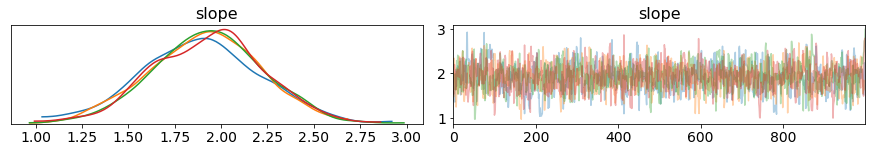

In [28]:
_ = pm.traceplot( linear_trace, 
                 var_names=['slope']
            );